In [28]:
import sys
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import subtle.subtle_io as suio
import subtle.subtle_preprocess as sup
sys.path.insert(0, '/home/subtle/jon/tools/SimpleElastix/build/SimpleITK-build/Wrapping/Python/Packaging/build/lib.linux-x86_64-3.5/SimpleITK')
import SimpleITK as sitk

In [29]:
base_path = '/home/subtle/Data/SubtleGAD_Hoag/Id0032/Neuro_Brain - 16479659'
path_zero, path_low, path_full = suio.get_dicom_dirs(base_path)

In [30]:
ims_zero, hdr_zero = suio.dicom_files(path_zero, normalize=False)
ims_low, hdr_low = suio.dicom_files(path_low, normalize=False)
ims_full, hdr_full = suio.dicom_files(path_full, normalize=False)

In [31]:
pixel_spacing_zero = suio.get_pixel_spacing(hdr_zero)
pixel_spacing_low = suio.get_pixel_spacing(hdr_low)
pixel_spacing_full = suio.get_pixel_spacing(hdr_full)

In [32]:
ims = np.stack((ims_zero, ims_low, ims_full), axis=1)

In [35]:
mask = sup.mask_im(ims)
print(mask.shape)

(224, 3, 320, 320)


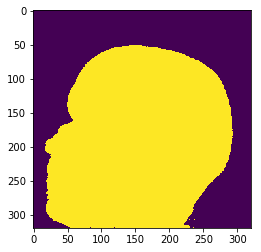

In [36]:
plt.imshow(mask[100,0,:,:].squeeze())

In [37]:
spars = sitk.GetDefaultParameterMap('rigid')

In [94]:
im_low_reg, spars_low_out = sup.register_im(ims[:,0,:,:], ims[:,1,:,:], param_map=spars, verbose=True, im_fixed_spacing=pixel_spacing_zero, im_moving_spacing=pixel_spacing_low)
im_full_reg, spars_full_out = sup.register_im(ims[:,0,:,:], ims[:,2,:,:], param_map=spars, verbose=True, im_fixed_spacing=pixel_spacing_zero, im_moving_spacing=pixel_spacing_low)

image registration
registration done, 7.69 s
image registration
registration done, 7.42 s


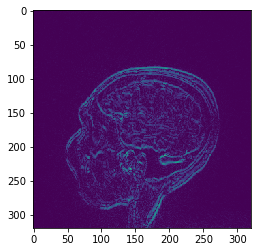

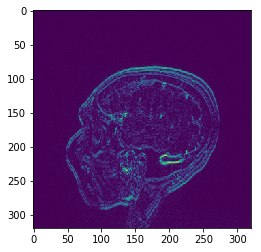

In [96]:
plt.imshow(abs(im_low_reg - ims_low)[50,:,:].squeeze())
plt.figure()
plt.imshow(abs(im_full_reg - ims_full)[50,:,:].squeeze())


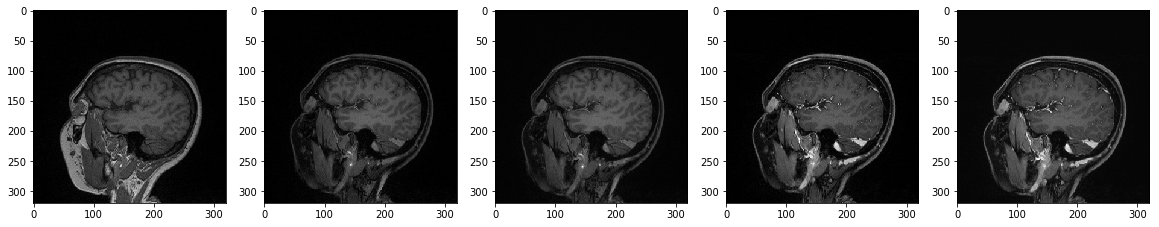

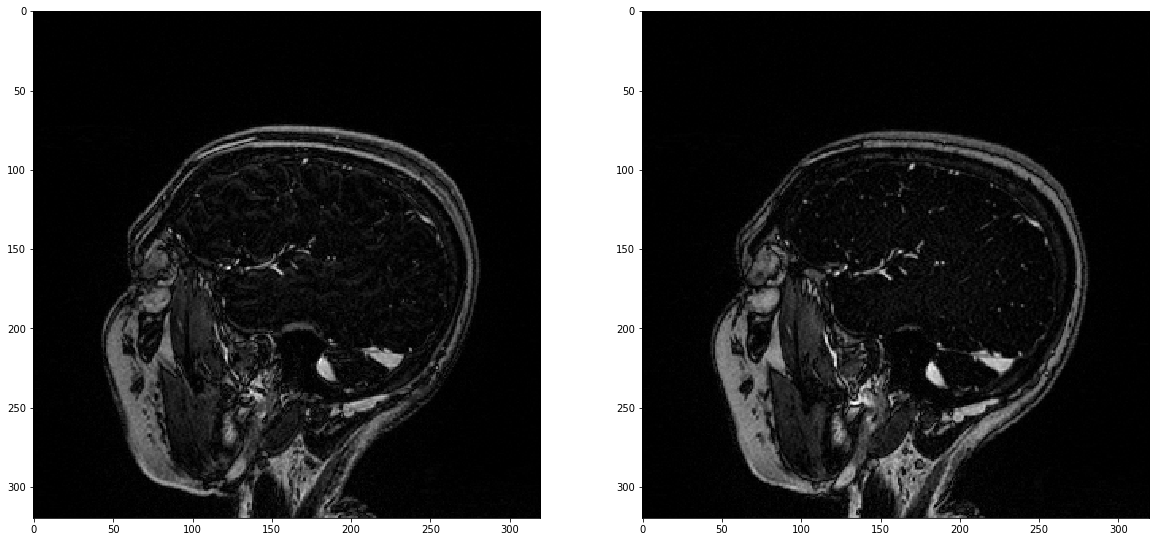

In [114]:
import subtle.subtle_plot as suplot
idx = 60
plt.figure(figsize=(20,10))
suplot.imshow3(np.stack((ims_zero[idx,:,:], ims_low[idx,:,:], im_low_reg[idx,:,:], ims_full[idx,:,:], im_full_reg[idx,:,:]), axis=0))

plt.figure(figsize=(20,10))
suplot.imshow3(np.stack((abs(ims_full[idx,:,:] - ims_zero[idx,:,:]), abs(im_full_reg[idx,:,:] - ims_zero[idx,:,:])), axis=0))

(224, 3, 320, 320)
(224, 320, 320, 1)


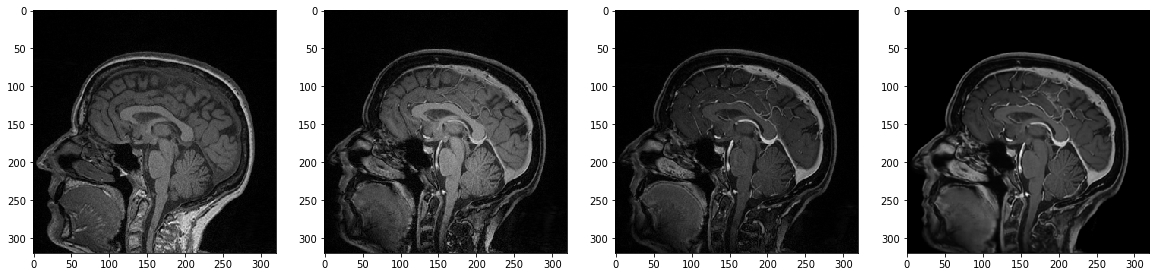

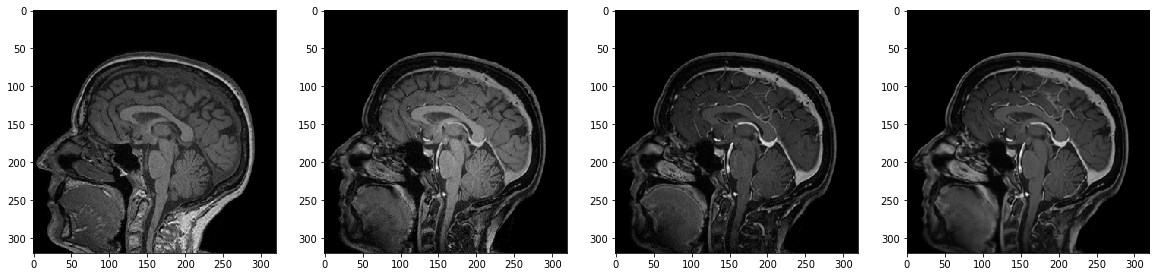

In [136]:
data = suio.load_file('/raid/jon/data_full_hoag/data/Id0032Neuro_Brain-16479659.npy')
print(data.shape)
data_pred = suio.load_file('/raid/jon/predictions/test_hoag_fix_scale/Id0032Neuro_Brain-16479659_predict_test_hoag_fix_scale.npy')
print(data_pred.shape)
idx=115
plt.figure(figsize=(20,10))
suplot.imshow3(np.stack((ims[idx,0,:,:], ims[idx,1,:,:], ims[idx,2,:,:], data_pred[idx,:,:,0]), axis=0))

plt.figure(figsize=(20,10))
suplot.imshow3(np.stack((data[idx,0,:,:], data[idx,1,:,:], data[idx,2,:,:], data_pred[idx,:,:,0]), axis=0))

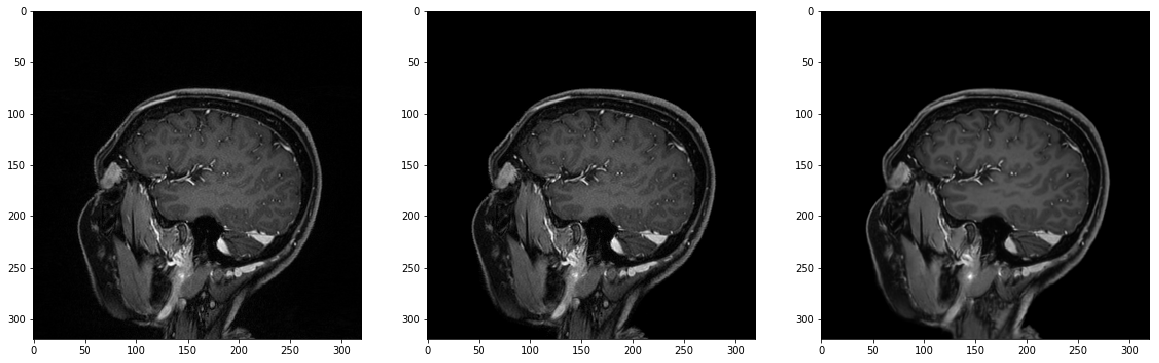

In [116]:
plt.figure(figsize=(20,10))
suplot.imshow3(np.stack((abs(im_full_reg[idx,:,:]), abs(data[idx,2,:,:]), abs(data_pred[idx,:,:,0])), axis=0))

In [117]:
spars = sitk.GetDefaultParameterMap('rigid')
spars2 = spars_out[0]
for key in spars.keys():
    print(key, spars[key])
print()
for key in spars2.keys():
    print(key, spars2[key])


AutomaticParameterEstimation ('true',)
CheckNumberOfSamples ('true',)
DefaultPixelValue ('0.0',)
FinalBSplineInterpolationOrder ('3',)
FixedImagePyramid ('FixedSmoothingImagePyramid',)
ImageSampler ('RandomCoordinate',)
Interpolator ('LinearInterpolator',)
MaximumNumberOfIterations ('256',)
MaximumNumberOfSamplingAttempts ('8',)
Metric ('AdvancedMattesMutualInformation',)
MovingImagePyramid ('MovingSmoothingImagePyramid',)
NewSamplesEveryIteration ('true',)
NumberOfResolutions ('4',)
NumberOfSamplesForExactGradient ('4096',)
NumberOfSpatialSamples ('2048',)
Optimizer ('AdaptiveStochasticGradientDescent',)
Registration ('MultiResolutionRegistration',)
ResampleInterpolator ('FinalBSplineInterpolator',)
Resampler ('DefaultResampler',)
ResultImageFormat ('nii',)
Transform ('EulerTransform',)
WriteIterationInfo ('false',)
WriteResultImage ('true',)

CenterOfRotationPoint ('119.625', '119.625', '89.2')
CompressResultImage ('false',)
ComputeZYX ('false',)
DefaultPixelValue ('0.0',)
Direction 